# Figure about remapping between random foraging and task, search/homing and light and dark.

Before running this file you need to run the othe scripts in this order:

1. open_field_light_dark_maps.ipynb
2. light_dark_stats.ipynb
3. light_dark_stats_pairs.ipynb
4. search_homing_light_dark_maps.ipynb
5. search_homing_stats.ipynb
6. search_homing_stats_pairs.ipynb


In [54]:
%load_ext autoreload
%autoreload 2

%run ~/repo/autopi_analysis_bk/Jazi_et.al_2023_noInt/setup_project.py
%run ~/repo/autopi_analysis_bk/Jazi_et.al_2023_noInt/neuronAutopi.py

prepareSessionsForSpatialAnalysisProject(sSesList,myProject.sessionList,pose_file_extension = ".pose_kf.npy")
import matplotlib.image as mpimg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Project name: autopi_ca1
dataPath: /ext_drives/d80/Jazi_etal_2023_noInter/autopi_ca1
dlcModelPath: /adata/models
Reading /ext_drives/d80/Jazi_etal_2023_noInter/autopi_ca1/sessionList
We have 39 testing sessions in the list
See myProject and sSesList objects
Loading Animal_pose and Spike_train, sSes.ap and sSes.cg


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:20<00:00,  1.91it/s]

Loading ses.trial_table_simple as ses.trials
Create condition intervals in ses.intervalDict


You will need about 6Gb of RAM for the next command.

In [55]:
%%time

myProject = loadMyProjectWithTrials(Project(name=projectName,dataPath=dataPath,dlcModelPath=dlcModelPath))

Project name: autopi_ca1
dataPath: /ext_drives/d80/Jazi_etal_2023_noInter/autopi_ca1
dlcModelPath: /adata/models
Loading: /ext_drives/d80/Jazi_etal_2023_noInter/autopi_ca1/results/myProjectWithTrials.pickle
CPU times: user 6.02 s, sys: 1.58 s, total: 7.61 s
Wall time: 20.1 s


In [56]:
myProject.dataPath

'/ext_drives/d80/Jazi_etal_2023_noInter/autopi_ca1'

In [57]:
for ses, sSes in tqdm(zip(myProject.sessionList,sSesList)):
    getSearchHomingIntervals(ses,sSes)

39it [00:00, 45.93it/s]


In [58]:
fn = myProject.dataPath+"/results/myMaps.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myMaps = pickle.load(handle)

fn = myProject.dataPath+"/results/myMapStats.csv" # , data frame with hd stats
mapStats = pd.read_csv(fn)

fn = myProject.dataPath+"/results/myAutos.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myAutos = pickle.load(handle)
    
fn=myProject.dataPath+"/results/mapCorDf.csv"
mapCorDf = pd.read_csv(fn)

fn=myProject.dataPath+"/results/pairs_ifrAsso_mapSim.csv"
pairDf = pd.read_csv(fn)

fn=myProject.dataPath+"/results/pairs_cc.npy"
pairCc = np.load(fn)


fn = myProject.dataPath+"/results/mySearchHomingMaps.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    SHmyMaps = pickle.load(handle)

    
fn=myProject.dataPath+"/results/mySearchHomingMapsInZone.pickle"
with open(fn, 'rb') as handle:
    SHmyMapsInZone = pickle.load(handle)
    
fn=myProject.dataPath+"/results/mySearchHomingMapsInZone_5cm_per_bin.pickle"
with open(fn, 'rb') as handle:
    SHmyMapsInZone5 = pickle.load(handle)
    
    
fn = myProject.dataPath+"/results/mySearchHomingMapStats.csv" # , data frame with hd stats
SHmapStats = pd.read_csv(fn)

fn=myProject.dataPath+"/results/searchHomingMapCorDf.csv"
print("Loading",fn)
SHmapCorDf = pd.read_csv(fn)

fn=myProject.dataPath+"/results/searchHomingPairs_ifrAsso_mapSim.csv"
print("Loading",fn)
SHpairDf = pd.read_csv(fn)
SHpairDf["mouse"] = SHpairDf.session.str.split("-").str[0]



Loading /ext_drives/d80/Jazi_etal_2023_noInter/autopi_ca1/results/searchHomingMapCorDf.csv
Loading /ext_drives/d80/Jazi_etal_2023_noInter/autopi_ca1/results/searchHomingPairs_ifrAsso_mapSim.csv


Only keep pyramidal cells

In [59]:
fn=myProject.dataPath+"/results/cell_classification_noint.csv"
ct = pd.read_csv(fn)
ct 

,Unnamed: 0,id,session,subject,valid,cellType,meanRate,shank,layer
0,0,mn5824-20112020-0107_80,mn5824-20112020-0107,mn5824,False,NaN,9.201345,4,pyr
1,1,mn5824-20112020-0107_90,mn5824-20112020-0107,mn5824,False,NaN,8.236764,3,pyr
2,2,mn5824-20112020-0107_92,mn5824-20112020-0107,mn5824,True,pyr,7.885922,4,pyr
3,3,mn5824-20112020-0107_96,mn5824-20112020-0107,mn5824,False,NaN,4.153462,1,dn
4,4,mn5824-20112020-0107_98,mn5824-20112020-0107,mn5824,False,NaN,3.411940,4,pyr
...,...,...,...,...,...,...,...,...,...
1075,1263,mn9686-01112021-0106_238,mn9686-01112021-0106,mn9686,False,NaN,4.669745,7,dn
1076,1264,mn9686-01112021-0106_240,mn9686-01112021-0106,mn9686,False,NaN,9.647625,2,pyr
1077,1265,mn9686-01112021-0106_241,mn9686-01112021-0106,mn9686,False,NaN,16.161014,2,pyr
1078,1266,mn9686-01112021-0106_242,mn9686-01112021-0106,mn9686,True,pyr,5.270951,1,pyr


In [63]:
#ct2= ct[ct.cellType!= 'int']
#ct2.shape
#ct2.to_csv(myProject.dataPath+"/results/cell_classification_noint.csv", index=True)


In [64]:
#ct2.shape[0],myMaps["circ80"].shape[0]

In [65]:
if ct.shape[0]!=myMaps["circ80"].shape[0]:
    print("problem with length of cell_classification.csv")
pyrIndices=ct.cellType=="pyr"
pyrId=ct.id[ct.cellType=="pyr"]
print("Pyramidal cells: {}".format(np.sum(ct.cellType=="pyr")))


Pyramidal cells: 438


In [66]:
for key in myMaps:
    myMaps[key]=myMaps[key][pyrIndices]
for key in SHmyMapsInZone:
    SHmyMapsInZone[key] = SHmyMapsInZone[key][pyrIndices]
for key in myAutos:
    myAutos[key]["auto"]=myAutos[key]["auto"][pyrIndices]
for key in SHmyMaps:
    SHmyMaps[key]=SHmyMaps[key][pyrIndices]
    
    
mapStats = mapStats[mapStats.cellId.isin(pyrId)]

SHmapStats = SHmapStats[SHmapStats.cellId.isin(pyrId)]


nCond = len(mapCorDf.condition.unique())
nCond=8
mapCorDf["cellId"] = np.concatenate([ct2.id.to_numpy()]*nCond) # 4 because of 4 conditions
mapCorDf = mapCorDf[mapCorDf.cellId.isin(pyrId)]

In [67]:
nCond = len(SHmapCorDf.condition.unique())
SHmapCorDf["cellId"] = np.concatenate([ct2.id.to_numpy()]*nCond) # 
SHmapCorDf = SHmapCorDf[SHmapCorDf.cellId.isin(pyrId)]


pairPyrIndices = np.logical_and(np.isin(pairDf.id1,pyrId),np.isin(pairDf.id2,pyrId)) # id1 and id2 in the pair are pyr
pairDf = pairDf[pairPyrIndices]
pairCc = pairCc[pairPyrIndices]

pairPyrIndices = np.logical_and(np.isin(SHpairDf.id1,pyrId),np.isin(SHpairDf.id2,pyrId)) # id1 and id2 in the pair are pyr
SHpairDf = SHpairDf[pairPyrIndices]

In [68]:
pyrId = pyrId.reset_index(drop=True)
pyrId

0       mn5824-20112020-0107_92
1      mn5824-20112020-0107_100
2      mn5824-20112020-0107_114
3      mn5824-20112020-0107_116
4      mn5824-20112020-0107_118
                 ...           
433     mn9686-01112021-0106_79
434     mn9686-01112021-0106_81
435    mn9686-01112021-0106_197
436    mn9686-01112021-0106_242
437    mn9686-01112021-0106_246
Name: id, Length: 438, dtype: object

In [69]:
def setFigureDefaultParameters():
    plt.rc('axes', labelsize=10) #fontsize of the title
    plt.rc('axes', titlesize=10) #fontsize of the title
    plt.rc('axes', linewidth=1.25) 
    plt.rc("xtick.major", width=1.25)
    plt.rc("ytick.major", width=1.25)


In [70]:
def get_sSesId_nId(cellId):
    sesName= cellId.split('_')[0]
    cellName= cellId.split('_')[1]
    sesid= [sSes.name for sSes in sSesList].index(sesName)
    sSes= sSesList[sesid]
    ses= myProject.sessionList[sesid]
    nid= [n.name for n in sSes.cg.neuron_list].index(cellName)
    n= sSes.cg.neuron_list[nid]
    return sSes,ses,n

#####################################
## get the mean waveform on the shank
#####################################
def get_mwf_onshank(sSes, ses, n):
    sSes.cg.set_info_from_session(sSes, 1)##
    ch= n.channels ## channel with the hieghest amp
    shanks_arr, active_shanks, electrodes = sSes.get_active_shanks(ch)
    shank= int(active_shanks[0])
    ### get ch number on the shank
    chOnshank=np.where(sSes.channel_positions[:,0]==shank)[0]
    return chOnshank

#################################
############# wf related func ###
#################################
def get_wfAndylimForHighamp(chOnshank,n, sSes):
    for i,ch in enumerate(chOnshank):
        if ch == n.channels:
            #print(n.cluster_number, ch)
            c,w= sSes.get_waveform_from_cluster(n.cluster_number, ch)
            #print(w)
            neww= w[w!=0]
            #print(len(neww))
            ylim= np.min(neww),np.max(neww)
    return neww, ylim

def getwf_plot(ax,cellId, plotScale=True):
    """
    Plot the waveforms on 8 channels from 1 neuron
    The channels are on a given shanks
    """
    yOffset=0.2
    xOffset=0.0022
    ncol=2
    spikeWidth=40
    samplingRate=20000
    sSes, ses, n= get_sSesId_nId(cellId)
    chOnshank= get_mwf_onshank (sSes, ses, n)
    # two variables for the origin of the scale bar
    minYValue=0
    minXValue=-0.0001
    for i,ch in enumerate(chOnshank):
        xOff = i%ncol*xOffset
        yOff = np.floor(i/ncol)*yOffset
        c,w= sSes.get_waveform_from_cluster(n.cluster_number, ch)
        # focus on the middle 40 datapoints
        start= int(w.shape[0]/2-spikeWidth/2)
        end = int(start+spikeWidth)
        time = np.arange(spikeWidth)/samplingRate
        currentMin = np.min(w[start:end]+yOff)
        if currentMin < minYValue:
            minYValue = currentMin
        ax.plot(time+xOff, w[start:end]+yOff, lw=1.5)
    if plotScale:
        # The scale bar for time is 0.001 sec, or 1 ms.
        ax.plot([minXValue,minXValue + 0.001],[minYValue-0.01,minYValue-0.01],color="black",lw=2)
        # I don't know what the units are for the y axis. The vertical scale is 0.1 in length
        ax.plot([minXValue,minXValue],[minYValue,minYValue+0.1],color="black",lw=2)
    ax.axis('off')


# Plot example of firing rate maps for random foraging and AutoPI task

We want to show that there is remapping between the two behaviors.
We show spike-on-path and firing rate maps

In [71]:
def plot_spike_on_path_auto_rf(gs,
                               cluIndex,
                               arenaRadius=40,
                               arenaRadiusProportionToPeri = 0.925,
                               conditions =  ["circ80","task"]):

    specPath = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=2,subplot_spec=gs[0])

    cond_names = {"circ80": "RF", "task":"AutoPI"}
    
    
    # zone for the analysis
    center = [0,0]
    

    cluId = pyrId[cluIndex]
    cluNo = cluId.split("_")[1]
    session = cluId.split("_")[0]
    ses = myProject.getSession(session)
    sSes = [sSes for sSes in sSesList if sSes.name==session][0]


    for i,cond in enumerate(conditions):

        ax = fig.add_subplot(specPath[i])

        arena=np.arange(start=0,stop=2*np.pi,step=0.02)
        ax.set_aspect('equal', adjustable='box')
        ax.plot(np.cos(arena)*arenaRadius,np.sin(arena)*arenaRadius,label="Arena",color="gray")
        #ax.plot(np.cos(arena)*arenaRadius*arenaRadiusProportionToPeri,np.sin(arena)*arenaRadius*arenaRadiusProportionToPeri,label="Periphery",color="gray",linestyle='dashed')

        # set the intervals for the condition
        inter = ses.intervalDict[cond]
        sSes.ap.set_intervals(inter)

        ## spike on path within the zone 
        sSes.ap.invalid_outside_spatial_area(environment_shape="circle",center=center,radius=45)
        
        ax.scatter(sSes.ap.pose[:,1],sSes.ap.pose[:,2],s=1,color="gray",alpha=0.1)

        n = [n for n in sSes.cg.neuron_list if n.name==cluNo][0]
        n.spike_train.set_intervals(inter)
        spike_posi = n.spatial_properties.spike_position()

        ax.scatter(spike_posi[:,0],spike_posi[:,1],s=2,color="red",alpha=0.1)
        ax.set_ylim(-55,60)
        ax.set_xlim(-55,55)
        ax.text(0,50,cond_names[cond],fontsize=9, horizontalalignment='center')
        ax.axis("off")
       

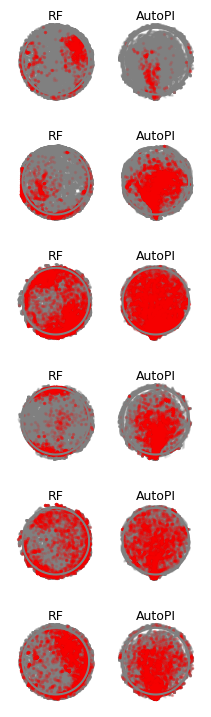

In [72]:
cluIndices = [306, 25,101, 405,106, 307]
#cluIndices = [306]
row=6
col=2
sizePerCol=1.0
sizePerRow=1.2
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = fig.add_gridspec(nrows=row, ncols=1,wspace=0.0,hspace=0.0) # one gridspec including all the figure

for i, cluIndex in enumerate(cluIndices):
    specPath = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=1,subplot_spec=gs[i])
    plot_spike_on_path_auto_rf(specPath,cluIndex)

In [73]:
def plotMap(ax,myMap,title="",titleY=0.95):
    """
    Plot one 2D map
    """
    ax.imshow(myMap.T,origin="lower",cmap='jet',interpolation=None)
    ax.set_title(title,y=titleY)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')


def plot_maps_rf_autopi(gs,
                      cluIndex,
                      conditions =  ["circ80","task"]):
    
    specTrial = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=2,subplot_spec=gs[0])
    cond_names = {"circ80": "RF", "task":"T"}
    
    # zone for the analysis
    center = [0,0]
    

    cluId = pyrId[cluIndex]
    cluNo = cluId.split("_")[1]
    session = cluId.split("_")[0]
    ses = myProject.getSession(session)
    sSes = [sSes for sSes in sSesList if sSes.name==session][0]
                                     
  
    for j,(cond) in enumerate(conditions): 
        wr = np.array([0.5,0.5])
        wr[j]=wr[j]+0.1
        ax = fig.add_subplot(specTrial[j])
        m = myMaps[cond][cluIndex,:,:]
        m = m[:,14:-2]
        plotMap(ax,m,title="",titleY=0.98)
        ax.text(m.shape[1]/2, m.shape[0], "{}:{:.2f} Hz".format(cond_names[cond],np.nanmax(m)),horizontalalignment='center',fontsize=9)
        ax.set_xlim(-3,m.shape[1]+3)
        ax.set_ylim(-3,m.shape[0]+3)
            

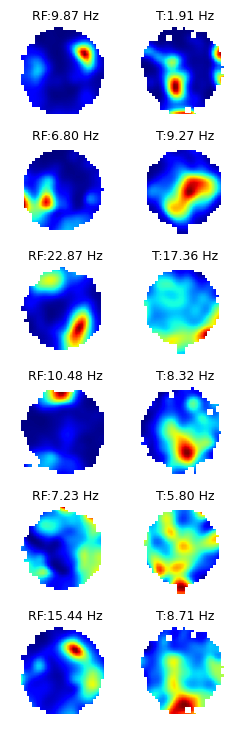

In [74]:
cluIndices = [306, 25,101, 405,106, 307]
row=6
col=2
sizePerCol=1.2
sizePerRow=1.2
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = fig.add_gridspec(nrows=row, ncols=1,wspace=0.0,hspace=0.0) # one gridspec including all the figure
for i, cluIndex in enumerate(cluIndices):
    specPath = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=1,subplot_spec=gs[i])
    plot_maps_rf_autopi(specPath,cluIndex)

In [75]:
def plot_rf_autopi_examples(gs):
    cluIndices = [306, 25,101, 405,106, 307]    
    row = len(cluIndices)
    specTwo = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=2,subplot_spec=gs[0])
    specPath = gridspec.GridSpecFromSubplotSpec(nrows=row,ncols=1,subplot_spec=specTwo[0])
    specMap = gridspec.GridSpecFromSubplotSpec(nrows=row,ncols=1,subplot_spec=specTwo[1])

    for i, cluIndex in enumerate(cluIndices):
        specPathOneCell = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=1,subplot_spec=specPath[i])
        plot_spike_on_path_auto_rf(specPathOneCell,cluIndex)

    for i, cluIndex in enumerate(cluIndices):
        specMapOneCell = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=1,subplot_spec=specMap[i])
        plot_maps_rf_autopi(specMapOneCell,cluIndex)

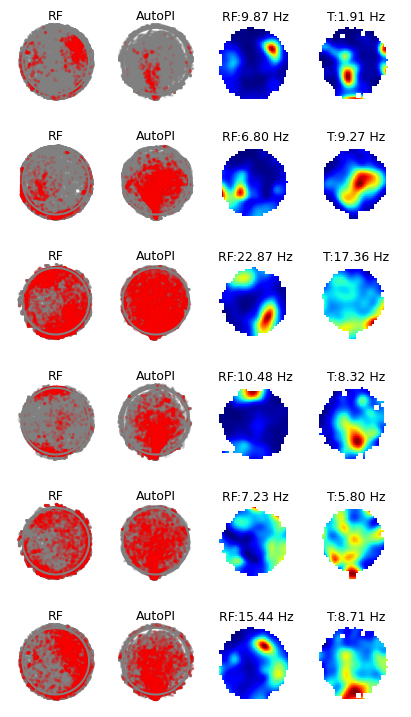

In [76]:
row=6
col=4
sizePerCol=1.0
sizePerRow=1.2
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs1 = fig.add_gridspec(nrows=1, ncols=1) # one gridspec including all the figure
plot_rf_autopi_examples(gs1)


In [77]:
def plot_map_sim_scatter(ax,cond1,cond2):

    cond_names={'mapSim_circ80_1':"RF1",
                'mapSim_circ80_2':"RF2",
                "mapSim_circ80":"RF",
                "mapSim_all_task":"AutoPI",
                "mapSim_all_light":"Light",
                "mapSim_all_dark": "Dark",
                "mapSim_all_task_1": "AutoPI1",
                "mapSim_all_task_2": "AutoPI2"}
    
    
    a = pairDf[cond1]
    b = pairDf[cond2]
    indices = np.logical_and(~np.isnan(a), ~np.isnan(b))
    r,pv =pearsonr(a[indices],b[indices])
    n = np.sum(indices)
    print("r:{:.2f}, p-value:{}, n:{}".format(r,pv,n))
    
    ax.scatter(a,b,s=1, alpha=0.2, color="grey")
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel(cond_names[cond1])
    ax.set_ylabel(cond_names[cond2])
    
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.text(-0.3,-0.9,"r={:.2f}".format(r))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_label_coords(-0.25,0.5)
    #ax.xaxis.set_label_coords(0.5,-0.29)

r:0.66, p-value:0.0, n:5075


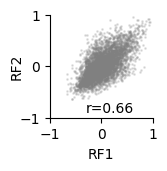

In [78]:
row=1
col=2
sizePerCol=1.6
sizePerRow=1.6
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = fig.add_gridspec(nrows=1, ncols=1) # one gridspec including all the figure
ax = fig.add_subplot(gs[0])

plot_map_sim_scatter(ax,cond1='mapSim_circ80_1',cond2='mapSim_circ80_2') 

r:0.55, p-value:0.0, n:5127


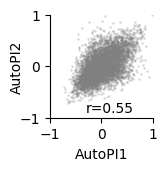

In [79]:
row=1
col=2
sizePerCol=1.6
sizePerRow=1.6
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = fig.add_gridspec(nrows=1, ncols=1) # one gridspec including all the figure
ax = fig.add_subplot(gs[0])

plot_map_sim_scatter(ax,cond1='mapSim_all_task_1',cond2='mapSim_all_task_2') 

In [80]:
pairDf.columns

Index(['ifrAsso_circ80', 'ifrAsso_circ80_1', 'ifrAsso_circ80_2',
       'ifrAsso_all_task', 'ifrAsso_all_task_1', 'ifrAsso_all_task_2',
       'ifrAsso_light', 'ifrAsso_dark', 'ifrAsso_light_1', 'ifrAsso_light_2',
       'ifrAsso_dark_1', 'ifrAsso_dark_2', 'ifrAsso_all_light',
       'ifrAsso_all_dark', 'ifrAsso_all_light_1', 'ifrAsso_all_light_2',
       'ifrAsso_all_dark_1', 'ifrAsso_all_dark_2', 'id1', 'id2', 'session',
       'mapSim_circ80', 'mapSim_circ80_1', 'mapSim_circ80_2',
       'mapSim_all_task', 'mapSim_all_task_1', 'mapSim_all_task_2',
       'mapSim_light', 'mapSim_dark', 'mapSim_light_1', 'mapSim_light_2',
       'mapSim_dark_1', 'mapSim_dark_2', 'mapSim_all_light', 'mapSim_all_dark',
       'mapSim_all_light_1', 'mapSim_all_light_2', 'mapSim_all_dark_1',
       'mapSim_all_dark_2', 'id1.1', 'id2.1', 'session.1'],
      dtype='object')

In [90]:
pairDf['mouse']=[cid1.split('-')[0] for cid1 in pairDf.id1]


In [91]:
pairDf

,ifrAsso_circ80,ifrAsso_circ80_1,ifrAsso_circ80_2,ifrAsso_all_task,ifrAsso_all_task_1,ifrAsso_all_task_2,ifrAsso_light,ifrAsso_dark,ifrAsso_light_1,ifrAsso_light_2,...,mapSim_all_light,mapSim_all_dark,mapSim_all_light_1,mapSim_all_light_2,mapSim_all_dark_1,mapSim_all_dark_2,id1.1,id2.1,session.1,mouse
21,-0.091828,-0.063065,-0.121687,-0.023921,-0.036597,-0.015462,0.015037,0.044518,0.029946,0.001785,...,0.282578,0.457383,0.068816,0.175512,0.313259,0.296184,mn5824-20112020-0107_92,mn5824-20112020-0107_100,mn5824-20112020-0107,mn5824
22,0.052365,0.073910,0.037768,-0.061093,-0.068342,-0.064014,-0.016365,-0.029233,-0.018834,-0.013267,...,-0.253845,-0.030114,-0.232756,-0.295880,-0.280077,0.150678,mn5824-20112020-0107_92,mn5824-20112020-0107_114,mn5824-20112020-0107,mn5824
23,0.090657,0.062220,0.116023,-0.049118,-0.089225,-0.011511,-0.011697,-0.027349,-0.022692,-0.001309,...,0.096521,0.344591,0.081249,0.094420,0.267376,0.382642,mn5824-20112020-0107_92,mn5824-20112020-0107_116,mn5824-20112020-0107,mn5824
24,0.005278,-0.075218,0.081084,-0.033683,-0.068591,0.015078,-0.013363,-0.022799,0.005896,-0.022358,...,0.238551,0.173964,0.337858,0.120725,0.289100,-0.055252,mn5824-20112020-0107_92,mn5824-20112020-0107_118,mn5824-20112020-0107,mn5824
25,-0.110992,-0.107382,-0.115123,0.063167,0.076364,0.052486,0.032997,0.124966,0.025868,0.041368,...,-0.442106,0.329155,-0.525344,-0.264357,0.291587,0.306029,mn5824-20112020-0107_92,mn5824-20112020-0107_122,mn5824-20112020-0107,mn5824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22632,-0.050186,-0.067404,-0.041245,0.013902,0.019317,0.005991,-0.030094,-0.044682,-0.043367,-0.019695,...,-0.079162,0.114080,-0.004653,-0.083732,0.206915,0.018243,mn9686-01112021-0106_81,mn9686-01112021-0106_242,mn9686-01112021-0106,mn9686
22633,0.081321,0.038737,0.122926,-0.007135,-0.033110,0.004270,-0.014177,-0.028109,0.007363,-0.035474,...,-0.022642,-0.381835,-0.009791,-0.152548,-0.177406,-0.401231,mn9686-01112021-0106_81,mn9686-01112021-0106_246,mn9686-01112021-0106,mn9686
22808,-0.008966,-0.004956,-0.023751,0.100510,0.089705,0.116335,0.016134,0.071920,0.007532,0.028246,...,0.205366,0.223402,0.113807,0.273568,0.372079,-0.041410,mn9686-01112021-0106_197,mn9686-01112021-0106_242,mn9686-01112021-0106,mn9686
22809,-0.055126,-0.023738,-0.078989,0.011989,0.051113,-0.017645,-0.026991,0.008282,-0.025337,-0.029993,...,-0.035209,-0.341916,-0.050574,-0.074411,-0.211873,-0.288988,mn9686-01112021-0106_197,mn9686-01112021-0106_246,mn9686-01112021-0106,mn9686


In [92]:
def stability_map_similarity_r_n(df,cond1='mapSim_circ80_1',cond2='mapSim_circ80_2'):
    
    cond_names={'mapSim_circ80_1':"RF1",
                'mapSim_circ80_2':"RF2",
                "mapSim_circ80":"RF",
                "mapSim_all_task":"AutoPI",
                "mapSim_all_light":"Light",
                "mapSim_all_dark": "Dark",
                "mapSim_all_task_1": "A1",
                "mapSim_all_task_2": "A2"}
    
    df1 = df.dropna()
    mouse = df.mouse.unique().item()
    r,_ = pearsonr(df1[cond1],df1[cond2])
    n = len(df[cond1])
    comp = cond_names[cond1]+"-"+cond_names[cond2]
    return pd.DataFrame({"comparison": [comp],
                         "r":r,"n":n})

def plot_map_similarity_RF_AutoPI_stats(ax):

    comparisons = [('mapSim_circ80_1' ,'mapSim_circ80_2'),
                   ("mapSim_circ80","mapSim_all_task"),
                   ("mapSim_circ80","mapSim_all_light"),
                   ("mapSim_circ80","mapSim_all_dark"),
                   ("mapSim_all_task_1","mapSim_all_task_2")]
    res = []
    for cond1,cond2 in comparisons:
        res.append(pairDf.groupby(["mouse"]).apply(stability_map_similarity_r_n,cond1 , cond2).reset_index())
    res = pd.concat(res).reset_index()
    res = res[["mouse","comparison","r","n"]]
    res = res[res.n>10]
    
    sns.boxplot(data=res,x="comparison",y="r",showfliers=False)
    sns.stripplot(data=res,x="comparison",y="r",color="black", s=3)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")
    ax.set_ylabel("Map sim.\nstability (r)")
    ax.set_xticks([0,1,2,3,4])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90,horizontalalignment='center',fontsize=9)
    return res

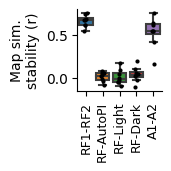

In [93]:
row=1
col=1
sizePerCol=1.6
sizePerRow=1.6
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = fig.add_gridspec(nrows=1, ncols=1,wspace=0.0,hspace=0.0) # one gridspec including all the figure
ax = fig.add_subplot(gs[0])
res = plot_map_similarity_RF_AutoPI_stats(ax)

In [94]:
res

,mouse,comparison,r,n
0,TYY5622,RF1-RF2,0.752851,79
2,mn1173,RF1-RF2,0.617633,1300
3,mn2739,RF1-RF2,0.739569,91
4,mn3246,RF1-RF2,0.686102,186
5,mn5618,RF1-RF2,0.548435,171
6,mn5824,RF1-RF2,0.677838,156
7,mn711,RF1-RF2,0.615563,284
8,mn9686,RF1-RF2,0.673227,2897
9,TYY5622,RF-AutoPI,-0.018073,79
11,mn1173,RF-AutoPI,0.030166,1300


In [95]:
from scipy.stats import wilcoxon

In [96]:
print(res.mouse.unique())
print("Number of mice:", len(res.mouse.unique()))

for cond1,cond2 in [("RF1-RF2","RF-AutoPI"),("RF1-RF2","RF-Light"),("RF1-RF2","RF-Dark")]:
    print("Comparison", cond1,cond2)
    a = res.r[res["comparison"]==cond1]
    b = res.r[res["comparison"]==cond2]
    print(wilcoxon(a,b))
    print()






['TYY5622' 'mn1173' 'mn2739' 'mn3246' 'mn5618' 'mn5824' 'mn711' 'mn9686']
Number of mice: 8
Comparison RF1-RF2 RF-AutoPI
WilcoxonResult(statistic=0.0, pvalue=0.0078125)

Comparison RF1-RF2 RF-Light
WilcoxonResult(statistic=0.0, pvalue=0.0078125)

Comparison RF1-RF2 RF-Dark
WilcoxonResult(statistic=0.0, pvalue=0.0078125)



r:0.66, p-value:0.0, n:5075
r:0.02, p-value:0.09648415942363038, n:5110


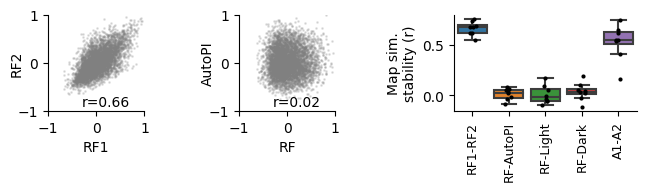

In [97]:
row=1
col=4
sizePerCol=1.6
sizePerRow=1.8
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = fig.add_gridspec(nrows=1, ncols=1) # one gridspec including all the figure


def plot_map_similarity_RF_AutoPI_stats_all(gs):
    gsStats = gridspec.GridSpecFromSubplotSpec(1,3, subplot_spec=gs[0])
    
    ax = fig.add_subplot(gsStats[0])
    plot_map_sim_scatter(ax,cond1='mapSim_circ80_1',cond2='mapSim_circ80_2')
    
    ax = fig.add_subplot(gsStats[1])
    plot_map_sim_scatter(ax,cond1='mapSim_circ80',cond2='mapSim_all_task')
    
    ax = fig.add_subplot(gsStats[2])
    plot_map_similarity_RF_AutoPI_stats(ax)
    
    
plot_map_similarity_RF_AutoPI_stats_all(gs)

r:0.66, p-value:0.0, n:5075
r:0.02, p-value:0.09648415942363038, n:5110


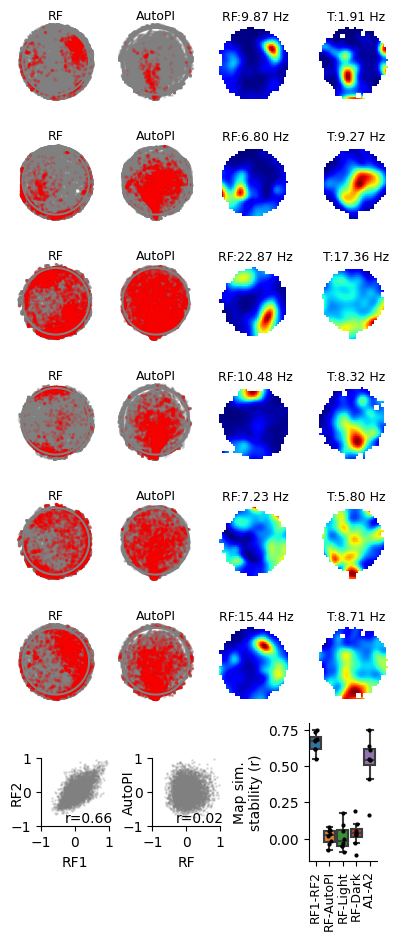

In [98]:
def plot_all_RF(gs):
    gsTwo =  gridspec.GridSpecFromSubplotSpec(2,1,height_ratios=[6,1.8], subplot_spec=gs[0])
    gsMaps =  gridspec.GridSpecFromSubplotSpec(1,1,subplot_spec=gsTwo[0])
    gsBottom = gridspec.GridSpecFromSubplotSpec(1,2,width_ratios=[3,0.2],subplot_spec=gsTwo[1])
    gsStats = gridspec.GridSpecFromSubplotSpec(1,1,subplot_spec=gsBottom[0])
    
    plot_rf_autopi_examples(gsMaps)
    plot_map_similarity_RF_AutoPI_stats_all(gsStats)


row=6+1.8
col=4
sizePerCol=1.0
sizePerRow=1.2
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = fig.add_gridspec(nrows=1, ncols=1) # one gridspec including all the figure
plot_all_RF(gs)

In [28]:
# row=6
# col=1
# sizePerCol=2
# sizePerRow=2.0
# fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
# gs = fig.add_gridspec(nrows=row, ncols=1) # one gridspec including all the figure
# ax = fig.add_subplot(gs[0])

# cluIndex = 295
# cluId = pyrId[cluIndex]
# getwf_plot(ax,cluId, plotScale=True)

# 4 AutoPI conditions

We want a figure that we will paste next to the one just above.

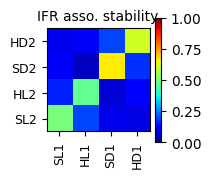

In [99]:
def plot_IFR_autopi_stability_matrix(ax,
                              cond_x = ["searchToLeverPath_light_1", "homingFromLeavingLever_light_1","searchToLeverPath_dark_1", "homingFromLeavingLever_dark_1"],
                              cond_y = ["searchToLeverPath_light_2", "homingFromLeavingLever_light_2","searchToLeverPath_dark_2", "homingFromLeavingLever_dark_2"],
                              prefixes = ["ifrAsso"],
                              prefix_names = {"ifrAsso": "IFR asso. stability", "mapSim": "Map sim. stability","mapSimInZone":"Map sim. stability"},
                              cond_names = {"searchToLeverPath_light": "SL", "homingFromLeavingLever_light":"HL","searchToLeverPath_dark":"SD","homingFromLeavingLever_dark":"HD",
                                          "searchToLeverPath_light_1":"SL1","searchToLeverPath_light_2":"SL2","searchToLeverPath_dark_1":"SD1","searchToLeverPath_dark_2":"SD2",
                                          "homingFromLeavingLever_light_1":"HL1","homingFromLeavingLever_light_2":"HL2","homingFromLeavingLever_dark_1":"HD1","homingFromLeavingLever_dark_2":"HD2"}):


    
    # calculate the R values for our matrix  
    r_values = np.empty((len(cond_x),len(cond_y)))
    p = prefixes[0]
    for i,c1 in enumerate(cond_x):
        for j,c2 in enumerate(cond_y):
            a = SHpairDf[p+"_"+c1]
            b = SHpairDf[p+"_"+c2]
            indices = np.logical_and(~np.isnan(a), ~np.isnan(b))
            r,pv =pearsonr(a[indices],b[indices])
            r_values[i,j]=r
    
    
    ax.set_title(prefix_names[p],fontsize=10)
    mat = ax.imshow(r_values,extent=[0,4,0,4],origin="lower",cmap='jet',interpolation=None,vmin = 0, vmax = 1)
    ax.set_xticks([0.5,1.5,2.5,3.5])
    ax.set_yticks([0.5,1.5,2.5,3.5])
    

    x_label_list = [cond_names[c1] for c1 in cond_x]
    ax.set_xticklabels(x_label_list,rotation=90,fontsize=9)
    
    y_label_list = [cond_names[c2] for c2 in cond_y]
    ax.set_yticklabels(y_label_list,rotation=0,fontsize=9)
    
    fig.colorbar(mat, ax=ax, shrink=0.65)
            
row=1
col=1
sizePerCol=2.0
sizePerRow=2.0

fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = fig.add_gridspec(nrows=1, ncols=1,wspace=0.0,hspace=0.0) # one gridspec including all the figure
ax = fig.add_subplot(gs[0])
    
plot_IFR_autopi_stability_matrix(ax)

Plot the map stability correlation matrix.

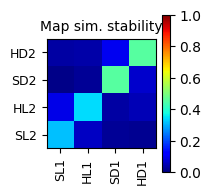

In [100]:
row=1
col=1
sizePerCol=2.0
sizePerRow=2.5
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = fig.add_gridspec(nrows=1, ncols=1,wspace=0.0,hspace=0.0) # one gridspec including all the figure
ax = fig.add_subplot(gs[0])
plot_IFR_autopi_stability_matrix(ax, prefixes = ["mapSim"])

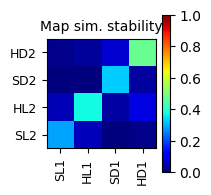

In [101]:
row=1
col=1
sizePerCol=2.0
sizePerRow=2.5
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = fig.add_gridspec(nrows=1, ncols=1,wspace=0.0,hspace=0.0) # one gridspec including all the figure
ax = fig.add_subplot(gs[0])
plot_IFR_autopi_stability_matrix(ax, prefixes = ["mapSimInZone"])

In [102]:
def corr_between_conditions(df, p,cond1,cond2):
    """
    return the correlation and number of observations between two columns of the data frame. 
    condition name is made from p_cond1 and p_cond2
    
    can be used to get the correlation per mouse
    
    """
    prefix_names = {"ifrAsso": "IFR asso. stability", "mapSim": "Map simil. stability"},
    cond_names = {"searchToLeverPath_light": "SL", "homingFromLeavingLever_light":"HL","searchToLeverPath_dark":"SD","homingFromLeavingLever_dark":"HD",
                "searchToLeverPath_light_1":"SL1","searchToLeverPath_light_2":"SL2","searchToLeverPath_dark_1":"SD1","searchToLeverPath_dark_2":"SD2",
                "homingFromLeavingLever_light_1":"HL1","homingFromLeavingLever_light_2":"HL2",
              "homingFromLeavingLever_dark_1":"HD1","homingFromLeavingLever_dark_2":"HD2"}
    a = df[p+"_"+cond1]
    b = df[p+"_"+cond2]
    indices = np.logical_and(~np.isnan(a), ~np.isnan(b))
    r,pv =pearsonr(a[indices],b[indices])
    n = np.sum(indices)
    return pd.DataFrame({"condition": cond_names[cond1]+"-"+cond_names[cond2] , "r":[r],"n":[n]})

In [103]:
def plot_IFR_autopi_stability_two(gs,
                              cond_pairs = [("searchToLeverPath_light","homingFromLeavingLever_light"),("searchToLeverPath_dark","homingFromLeavingLever_dark"),
                                              ("searchToLeverPath_light","searchToLeverPath_dark"),("homingFromLeavingLever_light","homingFromLeavingLever_dark"),
                                              ("searchToLeverPath_light","homingFromLeavingLever_dark"),("searchToLeverPath_dark","homingFromLeavingLever_light"),
                                              ("searchToLeverPath_light_1","searchToLeverPath_light_2"),("searchToLeverPath_dark_1","searchToLeverPath_dark_2"),("homingFromLeavingLever_light_1","homingFromLeavingLever_light_2"),("homingFromLeavingLever_dark_1","homingFromLeavingLever_dark_2")  ],
                            prefixes = ["ifrAsso"],
                            prefix_names = {"ifrAsso": "IFR asso. stability", "mapSim": "Map sim. stability","mapSimInZone": "Map sim. stability"},
                            cond_names = {"searchToLeverPath_light": "SL", "homingFromLeavingLever_light":"HL","searchToLeverPath_dark":"SD","homingFromLeavingLever_dark":"HD",
                                          "searchToLeverPath_light_1":"SL1","searchToLeverPath_light_2":"SL2","searchToLeverPath_dark_1":"SD1","searchToLeverPath_dark_2":"SD2",
                                          "homingFromLeavingLever_light_1":"HL1","homingFromLeavingLever_light_2":"HL2","homingFromLeavingLever_dark_1":"HD1","homingFromLeavingLever_dark_2":"HD2"},
                              xSpace=0.1):


    gsStats = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[0],width_ratios=[1,xSpace,1.0])
    
    ax = fig.add_subplot(gsStats[0])
    plot_IFR_autopi_stability_matrix(ax,prefixes=prefixes)
    
    
    # calculate the R per mouse
    ax = fig.add_subplot(gsStats[2])
    
    p = prefixes[0]
    df = pd.DataFrame()
    for i,(cond1,cond2) in enumerate(cond_pairs):
        res = SHpairDf.groupby(["mouse"]).apply(corr_between_conditions,p,cond1,cond2).reset_index()
        res= res[["mouse","condition","r","n"]]
        df = pd.concat([df,res])
        
    # Plot a vertical line and perpendicular line for the statistical significant values
    # Data for the line plot
    x_values1 = [0, 5];y_values1 = [0.3, 0.3]
    x_values2 = [2.5, 2.5];y_values2 = [0.3, 0.95]
    x_values3 = [2.5, 7.5];y_values3 = [0.95, 0.95]
    x_values4 = [6, 9];y_values4 = [0.9, 0.9]
    x_values5 = [7.5, 7.5];y_values5 = [0.9, 0.95]

    plt.plot(x_values1,y_values1, linestyle='-', color='k')
    plt.plot(x_values2,y_values2, linestyle='-', color='k')
    plt.plot(x_values3,y_values3, linestyle='-', color='k')
    plt.plot(x_values4,y_values4, linestyle='-', color='k')
    plt.plot(x_values5,y_values5, linestyle='-', color='k')
    
    ### add the star####
    ####################
    text_x = 4.5
    text_y = 0.96
    text_content = '*'
    plt.text(text_x, text_y, text_content, fontsize=12, color='k')
    df = df[df.n > 10]
    sns.boxplot(data=df, x="condition",y="r",showfliers=False)
    sns.stripplot(data=df, x="condition",y="r",color="black",s=3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel(prefix_names[p])
    ax.set_xticklabels(["SL-HL","SD-HD","SL-SD","HL-HD","SL-HD","SD-HL","SL1-SL2","SD1-SD2","HL1-HL2","HD1-HD2"], rotation=90,horizontalalignment='center',fontsize=9)
    ax.set_ylim(-0.2,1.0)
    ax.set_xlabel("")
    return df

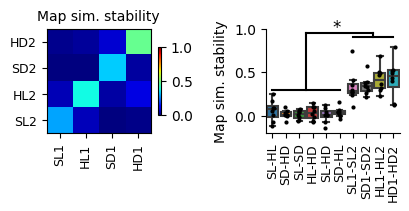

In [104]:
row=1
col=2
sizePerCol=2
sizePerRow=2
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = fig.add_gridspec(nrows=1, ncols=1,wspace=0.0,hspace=0.0) # one gridspec including all the figure
df = plot_IFR_autopi_stability_two(gs, prefixes = ["mapSimInZone"])

In [105]:
df.condition.unique()

array(['SL-HL', 'SD-HD', 'SL-SD', 'HL-HD', 'SL-HD', 'SD-HL', 'SL1-SL2',
       'SD1-SD2', 'HL1-HL2', 'HD1-HD2'], dtype=object)

In [107]:
res = df
print(res.mouse.unique())
print("Number of mice:", len(res.mouse.unique()))

for cond1,cond2 in [("SL-HL","SL1-SL2"), # control is based on first condition
                    ("SD-HD","SL1-SL2"),
                    ("SL-SD","SL1-SL2"),
                    ("HL-HD", "HL1-HL2"),
                    ("SL-HD","SL1-SL2"),
                    ("SD-HL","SD1-SD2"),
                    
                    ("SL-HL","HL1-HL2"), # control is based on second condition
                    ("SD-HD","HD1-HD2"),
                    ("SL-SD","SD1-SD2"),
                    ("HL-HD", "HD1-HD2"),
                    ("SL-HD","HD1-HD2"),
                    ("SD-HL","HL1-HL2")]:
    print("Comparison", cond1,cond2)
    a = res.r[res["condition"]==cond1]
    b = res.r[res["condition"]==cond2]
    print(wilcoxon(a,b))
    print()



['TYY5622' 'mn1173' 'mn2739' 'mn3246' 'mn5618' 'mn5824' 'mn711' 'mn9686']
Number of mice: 8
Comparison SL-HL SL1-SL2
WilcoxonResult(statistic=0.0, pvalue=0.0078125)

Comparison SD-HD SL1-SL2
WilcoxonResult(statistic=0.0, pvalue=0.0078125)

Comparison SL-SD SL1-SL2
WilcoxonResult(statistic=0.0, pvalue=0.0078125)

Comparison HL-HD HL1-HL2
WilcoxonResult(statistic=0.0, pvalue=0.0078125)

Comparison SL-HD SL1-SL2
WilcoxonResult(statistic=0.0, pvalue=0.0078125)

Comparison SD-HL SD1-SD2
WilcoxonResult(statistic=0.0, pvalue=0.0078125)

Comparison SL-HL HL1-HL2
WilcoxonResult(statistic=1.0, pvalue=0.015625)

Comparison SD-HD HD1-HD2
WilcoxonResult(statistic=0.0, pvalue=0.0078125)

Comparison SL-SD SD1-SD2
WilcoxonResult(statistic=0.0, pvalue=0.0078125)

Comparison HL-HD HD1-HD2
WilcoxonResult(statistic=0.0, pvalue=0.0078125)

Comparison SL-HD HD1-HD2
WilcoxonResult(statistic=0.0, pvalue=0.0078125)

Comparison SD-HL HL1-HL2
WilcoxonResult(statistic=0.0, pvalue=0.0078125)



# Remapping in a well-explored region of the arena (20-wide band going from the bridge to the center of the arena).

* Show spike on path in the 4 conditions for neurons with a clear field in this zone.
* Quantify map similarity between conditions, stability of map similarity for cell pairs, and population vector analysis

In [110]:
sSes = sSesList[0]
ses = myProject.sessionList[0]

In [111]:
ses.intervalDict.keys()

dict_keys(['circ80', 'circ80_1', 'circ80_2', 'task', 'task_1', 'task_2', 'light', 'light_1', 'light_2', 'dark', 'dark_1', 'dark_2', 'searchPath_light', 'searchPath_light_1', 'searchPath_light_2', 'searchPath_dark', 'searchPath_dark_1', 'searchPath_dark_2', 'searchToLeverPath_light', 'searchToLeverPath_light_1', 'searchToLeverPath_light_2', 'searchToLeverPath_dark', 'searchToLeverPath_dark_1', 'searchToLeverPath_dark_2', 'homingPath_light', 'homingPath_light_1', 'homingPath_light_2', 'homingPath_dark', 'homingPath_dark_1', 'homingPath_dark_2', 'homingFromLeavingLever_light', 'homingFromLeavingLever_light_1', 'homingFromLeavingLever_light_2', 'homingFromLeavingLever_dark', 'homingFromLeavingLever_dark_1', 'homingFromLeavingLever_dark_2', 'homingFromLeavingLeverToPeriphery_light', 'homingFromLeavingLeverToPeriphery_light_1', 'homingFromLeavingLeverToPeriphery_light_2', 'homingFromLeavingLeverToPeriphery_dark', 'homingFromLeavingLeverToPeriphery_dark_1', 'homingFromLeavingLeverToPeriphery_

In [112]:
def plot_spike_on_path_in_zone(gs,
                               cluIndex,
                               arenaRadius=40,
                               arenaRadiusProportionToPeri = 0.925,
                               conditions = ["searchToLeverPath_light","searchToLeverPath_dark","homingFromLeavingLever_light","homingFromLeavingLever_dark"]):

    specPath = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=4,subplot_spec=gs[0])

    cond_names = {"searchToLeverPath_light": "SL", "homingFromLeavingLever_light":"HL","searchToLeverPath_dark":"SD","homingFromLeavingLever_dark":"HD",
                  "searchToLeverPath_light_1":"SL1","searchToLeverPath_light_2":"SL2","searchToLeverPath_dark_1":"SD1","searchToLeverPath_dark_2":"SD2",
                  "homingFromLeavingLever_light_1":"HL1","homingFromLeavingLever_light_2":"HL2","homingFromLeavingLever_dark_1":"HD1","homingFromLeavingLever_dark_2":"HD2"}

    

    # zone for the analysis
    center = [0,-20]
    length = [20,40]

    cluId = pyrId[cluIndex]
    #print(cluId)
    cluNo = cluId.split("_")[1]
    session = cluId.split("_")[0]
    ses = myProject.getSession(session)
    sSes = [sSes for sSes in sSesList if sSes.name==session][0]


    for i,cond in enumerate(conditions):

        ax = fig.add_subplot(specPath[i])

        arena=np.arange(start=0,stop=2*np.pi,step=0.02)
        ax.set_aspect('equal', adjustable='box')
        ax.plot(np.cos(arena)*arenaRadius,np.sin(arena)*arenaRadius,label="Arena",color="gray")
        ax.plot(np.cos(arena)*arenaRadius*arenaRadiusProportionToPeri,np.sin(arena)*arenaRadius*arenaRadiusProportionToPeri,label="Periphery",color="gray",linestyle='dashed')

        # set the intervals for the condition
        inter = ses.intervalDict[cond]
        sSes.ap.set_intervals(inter)

        ax.scatter(sSes.ap.pose[:,1],sSes.ap.pose[:,2],s=2,color="gray",alpha=0.1)

        # plot in read what is in our region for the analysis
        plt.plot([center[0]-length[0]/2, center[0]-length[0]/2, center[0]+length[0]/2, center[0]+length[0]/2,center[0]-length[0]/2],
                 [center[1]-length[1]/2, center[1]+length[1]/2, center[1]+length[1]/2, center[1]-length[1]/2,center[1]-length[1]/2])


        ## spike on path within the zone 
        sSes.ap.invalid_outside_spatial_area(environment_shape="rectangle",center=center,length=length)

        n = [n for n in sSes.cg.neuron_list if n.name==cluNo][0]
        n.spike_train.set_intervals(inter)
        spike_posi = n.spatial_properties.spike_position()

        ax.scatter(spike_posi[:,0],spike_posi[:,1],s=2,color="red",alpha=0.1)
        #ax.set_ylim(-42,42)
        #ax.set_xlim(-42,42)
        #ax.text(0,45,cond_names[cond],fontsize=9, horizontalalignment='center')
        ax.set_ylim(-50,50)
        ax.set_xlim(-50,50)
        ax.text(0,50,cond_names[cond],fontsize=9, horizontalalignment='center')
        
        ax.axis("off")
       

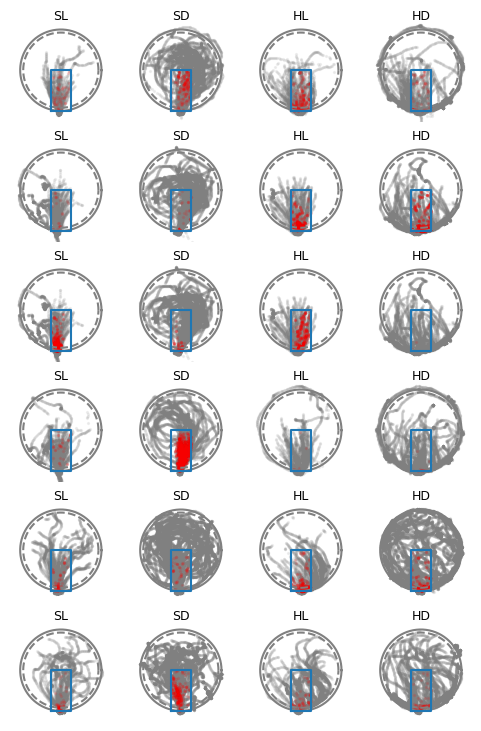

In [113]:
row=6
col=4
sizePerCol=1.2
sizePerRow=1.2
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = fig.add_gridspec(nrows=row, ncols=1) # one gridspec including all the figure

for i,cluIndex in enumerate([295,368,389,427,224,61]):
    specPath = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=1,subplot_spec=gs[i])
    plot_spike_on_path_in_zone(specPath, cluIndex)

One reviewer likes spike waveforms.

Create the firing rate maps for the zone of interest.

In [114]:
def plot_zone_maps(gs,
                   cluIndex,
                   arenaRadius=40,
                   arenaRadiusProportionToPeri = 0.925,
                   conditions = ["searchToLeverPath_light","searchToLeverPath_dark","homingFromLeavingLever_light","homingFromLeavingLever_dark"]):

    specPath = gridspec.GridSpecFromSubplotSpec(nrows=2,ncols=1,subplot_spec=gs[0], height_ratios=[0.1,1])
    
    
    cond_names = {"searchToLeverPath_light": "SL", "homingFromLeavingLever_light":"HL","searchToLeverPath_dark":"SD","homingFromLeavingLever_dark":"HD",
                  "searchToLeverPath_light_1":"SL1","searchToLeverPath_light_2":"SL2","searchToLeverPath_dark_1":"SD1","searchToLeverPath_dark_2":"SD2",
                  "homingFromLeavingLever_light_1":"HL1","homingFromLeavingLever_light_2":"HL2","homingFromLeavingLever_dark_1":"HD1","homingFromLeavingLever_dark_2":"HD2"}

    # zone for the analysis
    center = [0,-20]
    length = [20,40]

    cluId = pyrId[cluIndex]
    cluNo = cluId.split("_")[1]
    session = cluId.split("_")[0]
    ses = myProject.getSession(session)
    sSes = [sSes for sSes in sSesList if sSes.name==session][0]

    res = []
    for i,cond in enumerate(conditions):

        inter = ses.intervalDict[cond]
        sSes.ap.set_intervals(inter)
        ## spike on path within the zone 
        sSes.ap.invalid_outside_spatial_area(environment_shape="rectangle",center=center,length=length)
        n = [n for n in sSes.cg.neuron_list if n.name==cluNo][0]
        n.spike_train.set_intervals(inter)
        n.spatial_properties.firing_rate_map_2d(cm_per_bin=2.5, 
                                                smoothing_sigma_cm=5, 
                                                smoothing = True, 
                                                xy_range=np.array([[-10,-40],[10,0]]))
        res.append(n.spatial_properties.firing_rate_map)


    marginX = 2
    mapX = 8
    sizeX = mapX+marginX
    mergedMap = np.empty((sizeX*4, 16))
    mergedMap[:,:] = np.nan
    for i, m in enumerate(res):
        start = i*sizeX
        end = start+8
        mergedMap[start:end,:] = m

    ax = fig.add_subplot(specPath[1])
    plotMap(ax,mergedMap,title="",titleY=0.98)
    
    ax.text(sizeX*1-sizeX/2-1, 17,cond_names[conditions[0]],fontsize=9, horizontalalignment='center')
    ax.text(sizeX*2-sizeX/2-1, 17,cond_names[conditions[1]],fontsize=9, horizontalalignment='center')
    ax.text(sizeX*3-sizeX/2-1, 17,cond_names[conditions[2]],fontsize=9, horizontalalignment='center')
    ax.text(sizeX*4-sizeX/2-1, 17,cond_names[conditions[3]],fontsize=9, horizontalalignment='center')
    
    
    
    
    ax = fig.add_subplot(specPath[0])
    ax.text(0.5,0.5, "{:.2f} Hz".format(np.nanmax(mergedMap)),fontsize=9, horizontalalignment='center')
    
    ax.axis("off")

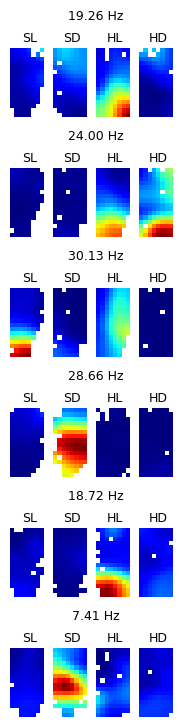

In [115]:
row=6
col=1
sizePerCol=1.2*1.5
sizePerRow=1.2
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = fig.add_gridspec(nrows=row, ncols=1) # one gridspec including all the figure

for i,cluIndex in enumerate([295,368,389,427,224,61]):
    specPath = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=1,subplot_spec=gs[i])
    plot_zone_maps(specPath, cluIndex)

In [116]:
def plot_autopi_remapping_examples(gs):
    cluIndices = [295,368,389,427,224,61]
    row = len(cluIndices)
    specTwo = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=2,width_ratios=[4,1.5],subplot_spec=gs[0])
    specPath = gridspec.GridSpecFromSubplotSpec(nrows=row,ncols=1,subplot_spec=specTwo[0])
    specMap = gridspec.GridSpecFromSubplotSpec(nrows=row,ncols=1,subplot_spec=specTwo[1])
    
    for i, cluIndex in enumerate(cluIndices):
        specPathOneCell = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=1,subplot_spec=specPath[i])
        plot_spike_on_path_in_zone(specPathOneCell, cluIndex)
        

    for i, cluIndex in enumerate(cluIndices):
        specMapOneCell = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=1,subplot_spec=specMap[i])
        plot_zone_maps(specMapOneCell, cluIndex) 

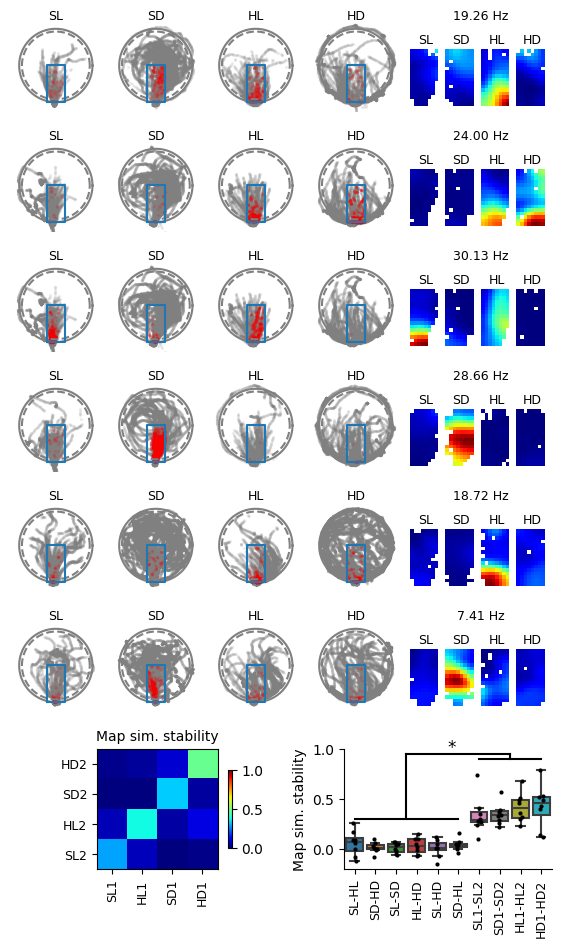

In [117]:
row=6+1.8
col=5.5
sizePerCol=1.0
sizePerRow=1.2
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = fig.add_gridspec(nrows=1, ncols=1) 


def plot_all_autopi(gs):
    specAll = gridspec.GridSpecFromSubplotSpec(nrows=2,ncols=1,height_ratios=[6,1.8],subplot_spec=gs[0])
    specPath = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=1,subplot_spec=specAll[0])
    specStats = gridspec.GridSpecFromSubplotSpec(nrows=1,ncols=1,subplot_spec=specAll[1])
    plot_autopi_remapping_examples(specPath)
    plot_IFR_autopi_stability_two(specStats, prefixes = ["mapSimInZone"])
    
plot_all_autopi(gs)

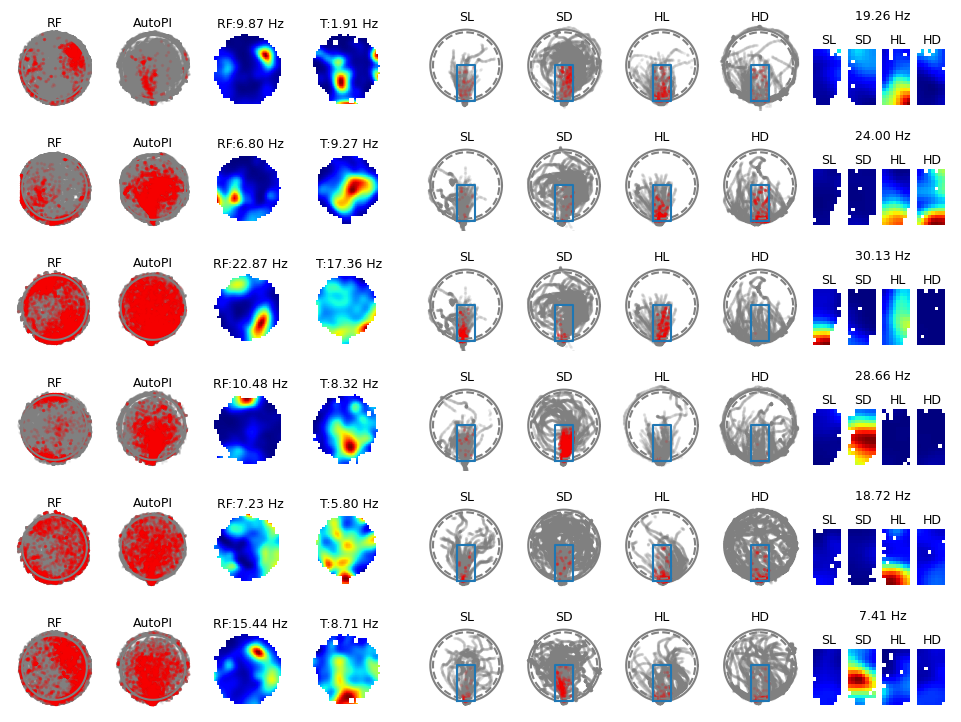

In [118]:
row=6
col=4 + 5.5
sizePerCol=1.0
sizePerRow=1.2
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = fig.add_gridspec(nrows=1, ncols=3, width_ratios=[4,0.2,5.5]) # one gridspec including all the figure

gsRF = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=1,subplot_spec=gs[0]) 
plot_rf_autopi_examples(gsRF)
gsAutoPI = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=1,subplot_spec=gs[2]) 
plot_autopi_remapping_examples(gsAutoPI)

(-0.5, 8266.5, 904.5, -0.5)

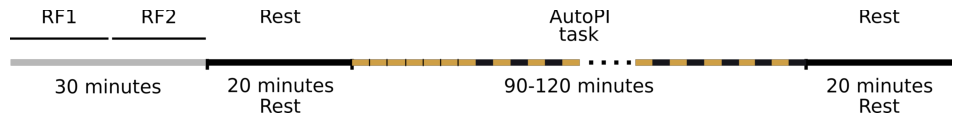

In [122]:
row=1.0
col=4+5.5 #
sizePerCol=1.0 # this was 1.2
sizePerRow=1.2
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = fig.add_gridspec(nrows=1, ncols=1,) # letters
ax = fig.add_subplot(gs[0])

import matplotlib.image as mpimg
fn = myProject.dataPath+"/results/protocol.png"
img = mpimg.imread(fn)
imgplot = ax.imshow(img)
ax.axis("off")


Saving /ext_drives/d80/Jazi_etal_2023_noInter/autopi_ca1/results/protocol2_with_labels.png


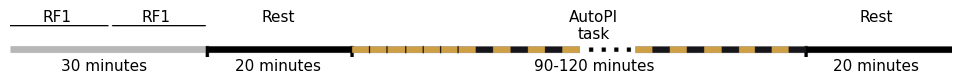

In [123]:
def add_labels_to_protocol(gs):
    gs1 = gridspec.GridSpecFromSubplotSpec(nrows=3, ncols=1,height_ratios=[0.2,0.6,0.2],subplot_spec=gs[0]) #
    ax = fig.add_subplot(gs1[1])
    fn = myProject.dataPath+"/results/protocol2.png"
    img = mpimg.imread(fn)
    imgplot = ax.imshow(img)
    ax.axis("off")
    ax = fig.add_subplot(gs[0])
    # first line
    ax.text(0.05,1, "RF1", horizontalalignment='center',verticalalignment="top",fontsize=11)
    ax.text(0.155,1, "RF1", horizontalalignment='center',verticalalignment="top",fontsize=11)
    ax.text(0.285,1, "Rest", horizontalalignment='center',verticalalignment="top",fontsize=11)
    ax.text(0.62,1, "AutoPI\ntask", horizontalalignment='center',verticalalignment="top",fontsize=11)
    ax.text(0.92,1, "Rest", horizontalalignment='center',verticalalignment="top",fontsize=11)
    # second line
    ax.text(0.1,0.0, "30 minutes", horizontalalignment='center',verticalalignment="top",fontsize=11)
    ax.text(0.285,0.0, "20 minutes", horizontalalignment='center',verticalalignment="top",fontsize=11)
    ax.text(0.62,0.0, "90-120 minutes", horizontalalignment='center',verticalalignment="top",fontsize=11)
    ax.text(0.92,0.0, "20 minutes", horizontalalignment='center',verticalalignment="top",fontsize=11)
    ax.axis("off")
    fn = myProject.dataPath+"/results/protocol2_with_labels.png"
    print("Saving",fn)
    plt.savefig(fn)
    
row=0.6
col=4+5.5 #
sizePerCol=1.0 # this was 1.2
sizePerRow=1.2
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = fig.add_gridspec(nrows=1, ncols=1,) # letters
add_labels_to_protocol(gs)

In [124]:
def plot_protocol(ax):
    fn = myProject.dataPath+"/results/protocol2_with_labels.png"
    img = mpimg.imread(fn)
    imgplot = ax.imshow(img)
    ax.axis("off")


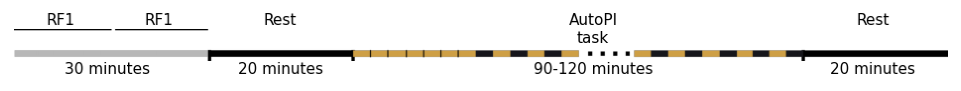

In [125]:
row=0.8
col=4+5.5 #
sizePerCol=1.0 # this was 1.2
sizePerRow=1.2
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = fig.add_gridspec(nrows=1, ncols=1,) # letters
ax = fig.add_subplot(gs[0])
plot_protocol(ax)

r:0.66, p-value:0.0, n:5075
r:0.02, p-value:0.09648415942363038, n:5110
saving /home/maryam/Desktop/Ca1_final/fig3/fig3.pdf


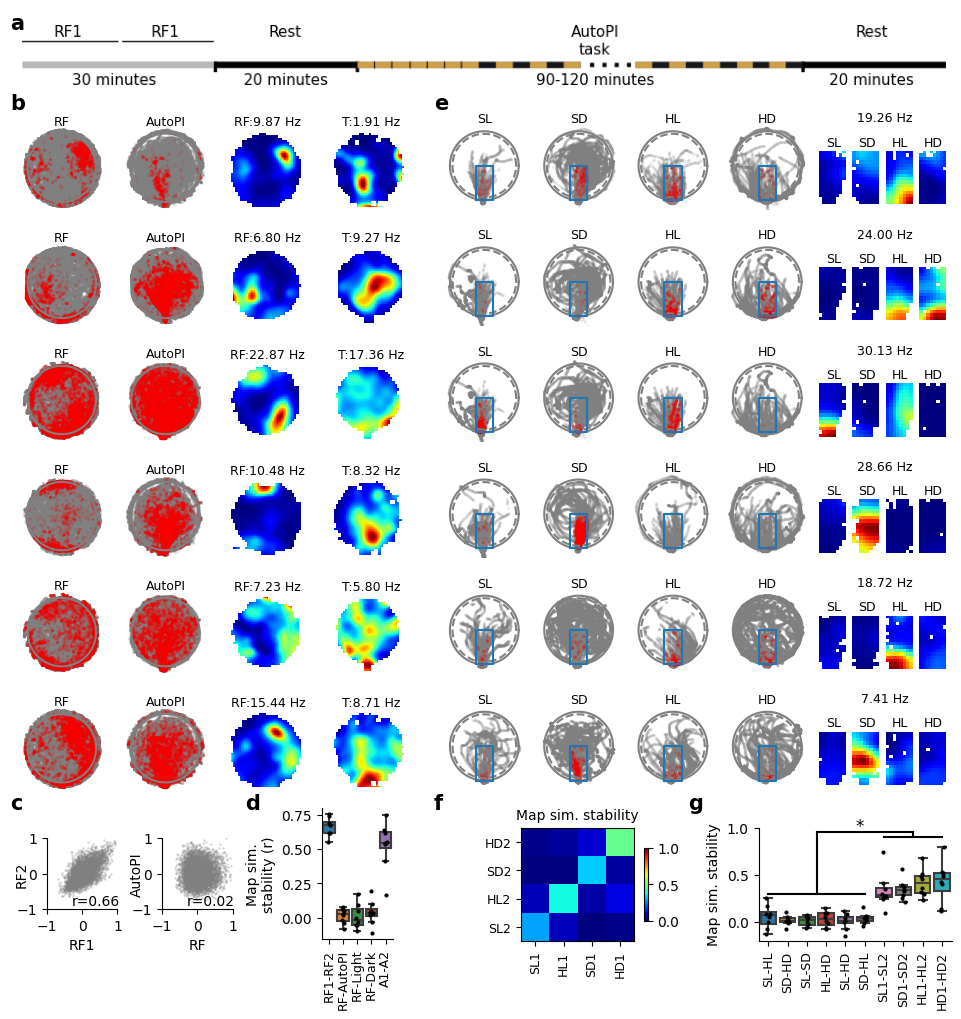

In [126]:
row= 0.6 + 6+1.8 # 6 example + 1.5 for graph
col=4 + 5.5 # 4 columns of RF-Task, then 5.5 columns for the AutoPI conditions
sizePerCol=1.0 # this was 1.2
sizePerRow=1.2
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on

gsLetters = fig.add_gridspec(nrows=1, ncols=1,) # letters

gs = fig.add_gridspec(nrows=4, ncols=4,height_ratios=[0.1,0.6,0.1,7.7], width_ratios=[0.05,4.2,0.15,5.3]) # we split RF-Task and AutoPI conditions
     
ax = fig.add_subplot(gs[1,1:]) # one gridspec for protocol
plot_protocol(ax)


gsRF = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=1,subplot_spec=gs[3,1]) # one gridspec for RF
plot_all_RF(gsRF)

gsAuto = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=1,subplot_spec=gs[3,3]) # one gridspec for autopi
plot_all_autopi(gsAuto)



ax = fig.add_subplot(gsLetters[0])
ax.text(0.0,0.98, 'a', style='normal',fontsize=15, weight="bold")
ax.text(0.0,0.90, 'b', style='normal',fontsize=15, weight="bold")
ax.text(0.0,0.20, 'c', style='normal',fontsize=15, weight="bold")
ax.text(0.25,0.20, 'd', style='normal',fontsize=15, weight="bold")

ax.text(0.45,0.90, 'e', style='normal',fontsize=15, weight="bold")
ax.text(0.45,0.20, 'f', style='normal',fontsize=15, weight="bold")
ax.text(0.72,0.20, 'g', style='normal',fontsize=15, weight="bold")


ax.axis("off")

fn = myProject.dataPath+"/results/remappingMainFigure.pdf"
fn= "/home/maryam/Desktop/Ca1_final/fig3/fig3.pdf"
print("saving",fn)
plt.savefig(fn, dpi=500)
plt.show()



## Population vector analysis from firing rate maps

To be able to do population analysis, we need to get rid of np.nan. 

I used 5x5 cm bins to minimize the effect of empty bins. 

The empty bins were filled with the mean of the firing rate to try to minimize their effect.

In [127]:
def fill_gaps(oneMap):
    """
    fill na.nan in a map with the mean of the map
    """
    oneMap[np.isnan(oneMap)] = np.nanmean(oneMap)
    
def fill_gaps_in_stack(stack):
    """
    fill all the maps in a stack
    """
    for i in range(stack.shape[0]):
        fill_gaps(stack[i])
    return stack
        
def normalize_map(oneMap):
    if np.nanmax(oneMap) > 0:
        oneMap = oneMap/np.nanmax(oneMap)
    return oneMap
        
def normalize_stack(stack):
    """
    Normalize firing rate so that the peak is 1.
    """
    for i in range(stack.shape[0]):
        stack[i] =  normalize_map(stack[i])
    return stack
    


In [128]:
SHmyMapsInZone.keys()

dict_keys(['searchToLeverPath_light', 'searchToLeverPath_light_1', 'searchToLeverPath_light_2', 'searchToLeverPath_dark', 'searchToLeverPath_dark_1', 'searchToLeverPath_dark_2', 'homingFromLeavingLever_light', 'homingFromLeavingLever_light_1', 'homingFromLeavingLever_light_2', 'homingFromLeavingLever_dark', 'homingFromLeavingLever_dark_1', 'homingFromLeavingLever_dark_2'])

In [129]:
cond_pairs = [("searchToLeverPath_light","homingFromLeavingLever_light"),("searchToLeverPath_dark","homingFromLeavingLever_dark"),
                  ("searchToLeverPath_light","searchToLeverPath_dark"),("homingFromLeavingLever_light","homingFromLeavingLever_dark"),
                  ("searchToLeverPath_light","homingFromLeavingLever_dark"),("searchToLeverPath_dark","homingFromLeavingLever_light"),
                  ("searchToLeverPath_light_1","searchToLeverPath_light_2"),("searchToLeverPath_dark_1","searchToLeverPath_dark_2"),
                  ("homingFromLeavingLever_light_1","homingFromLeavingLever_light_2"),("homingFromLeavingLever_dark_1","homingFromLeavingLever_dark_2")]
prefixes = ["ifrAsso"]
prefix_names = {"ifrAsso": "IFR asso. stability", "mapSim": "Map simil. stability","mapSimInZone": "Map simil. stability\n(zone)"}
cond_names = {"searchToLeverPath_light": "SL", "homingFromLeavingLever_light":"HL","searchToLeverPath_dark":"SD","homingFromLeavingLever_dark":"HD",
              "searchToLeverPath_light_1":"SL1","searchToLeverPath_light_2":"SL2","searchToLeverPath_dark_1":"SD1","searchToLeverPath_dark_2":"SD2",
              "homingFromLeavingLever_light_1":"HL1","homingFromLeavingLever_light_2":"HL2","homingFromLeavingLever_dark_1":"HD1","homingFromLeavingLever_dark_2":"HD2"}

r_values_3D = np.empty(len(cond_pairs))
r_values_map = np.empty((len(cond_pairs),SHmyMapsInZone["searchToLeverPath_light"][0].shape[0],SHmyMapsInZone["searchToLeverPath_light"][0].shape[1]))
for i,(cond1,cond2) in enumerate(cond_pairs):
    a = SHmyMapsInZone[cond1].copy()
    b = SHmyMapsInZone[cond2].copy()
    a =  fill_gaps_in_stack(a)
    b = fill_gaps_in_stack(b)
    r_values_3D[i],_ = pearsonr(a.flatten(),b.flatten())

    for x in range(a[0].shape[0]):
        for y in range(a[0].shape[1]):
            r_values_map[i,x,y],_ = pearsonr(a[:,x,y],b[:,x,y])
        
        
cond_pairs_names = { "searchToLeverPath_light-homingFromLeavingLever_light": "SL-HL", 
                    "searchToLeverPath_dark-homingFromLeavingLever_dark":"SD-HD",
                    "searchToLeverPath_light-searchToLeverPath_dark": "SL-SD",
                    "homingFromLeavingLever_light-homingFromLeavingLever_dark":"HL-HD",
                    "searchToLeverPath_light-homingFromLeavingLever_dark": "SL-HD",
                    "searchToLeverPath_dark-homingFromLeavingLever_light": "SD-HL",
                    "searchToLeverPath_light_1-searchToLeverPath_light_2": "SL1-SL2",
                    "searchToLeverPath_dark_1-searchToLeverPath_dark_2": "SD1-SD2",
                    "homingFromLeavingLever_light_1-homingFromLeavingLever_light_2": "HL1-HL2",
                    "homingFromLeavingLever_dark_1-homingFromLeavingLever_dark_2" : "HD1-HD2" }

res = []

for i,(cond1,cond2) in enumerate(cond_pairs):
    cn = cond_pairs_names[cond1+"-"+cond2]
    res.append(pd.DataFrame({"condition": cn,
                 "r": r_values_map[i].flatten()}))
res = pd.concat(res)        

In [130]:
res

,condition,r
0,SL-HL,0.380465
1,SL-HL,0.362884
2,SL-HL,0.371788
3,SL-HL,0.365808
4,SL-HL,0.381877
...,...,...
123,HD1-HD2,0.812927
124,HD1-HD2,0.822730
125,HD1-HD2,0.814715
126,HD1-HD2,0.774657


saving /home/maryam/Desktop/Ca1_final/Sup7/remappingFigureZonePopVectorCorr.pdf


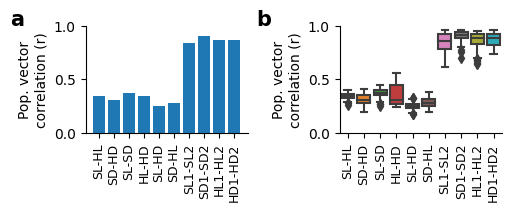

In [131]:
row=1
col=2
sizePerCol=2.5
sizePerRow=2.0
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = fig.add_gridspec(nrows=2, ncols=4, height_ratios=[0.1,1], width_ratios=[0.05,1,0.1,1]) # one gridspec including all the figure

gsLetters = fig.add_gridspec(nrows=1, ncols=1) # one gridspec including all the figure


ax = fig.add_subplot(gs[1,1])
xpos = np.arange(len(r_values_3D))
ax.bar(xpos,r_values_3D)
ax.set_ylim(0.0,1.0)
ax.set_xticks(xpos)
ax.set_xticklabels(["SL-HL","SD-HD","SL-SD","HL-HD","SL-HD","SD-HL","SL1-SL2","SD1-SD2","HL1-HL2","HD1-HD2"], rotation=90,horizontalalignment='center',fontsize=9)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("Pop. vector\ncorrelation (r)")

ax = fig.add_subplot(gs[1,3])
sns.boxplot(data=res,x="condition",y="r")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("Pop. vector\ncorrelation (r)")
ax.set_xticklabels(["SL-HL","SD-HD","SL-SD","HL-HD","SL-HD","SD-HL","SL1-SL2","SD1-SD2","HL1-HL2","HD1-HD2"], rotation=90,horizontalalignment='center',fontsize=9)
ax.set_ylim(0.0,1.0)
ax.set_xlabel("")


ax = fig.add_subplot(gsLetters[0])
ax.text(0.0,1, 'a', style='normal',fontsize=15, weight="bold")
ax.text(0.50,1, 'b', style='normal',fontsize=15, weight="bold")
ax.axis("off")

#fn = "/home//results/remappingFigureZonePopVectorCorr.pdf"
fn = "/home/maryam/Desktop/Ca1_final/Sup7/remappingFigureZonePopVectorCorr.pdf"

print("saving",fn)
plt.savefig(fn,dpi= 300)
plt.show()

Get stats for b.

In [132]:
from scipy.stats import mannwhitneyu
from itertools import chain, combinations
for cond1,cond2 in combinations(res.condition.unique(),2):
    print(cond1,cond2)
    if "1" not in cond1 and "1" in cond2:  
        print(mannwhitneyu(res[res.condition==cond1].r,
                 res[res.condition==cond2].r))
        print(len(res[res.condition==cond1].r))

SL-HL SD-HD
SL-HL SL-SD
SL-HL HL-HD
SL-HL SL-HD
SL-HL SD-HL
SL-HL SL1-SL2
MannwhitneyuResult(statistic=0.0, pvalue=1.7137454824777748e-43)
128
SL-HL SD1-SD2
MannwhitneyuResult(statistic=0.0, pvalue=1.7137454824777748e-43)
128
SL-HL HL1-HL2
MannwhitneyuResult(statistic=0.0, pvalue=1.7137454824777748e-43)
128
SL-HL HD1-HD2
MannwhitneyuResult(statistic=0.0, pvalue=1.7137454824777748e-43)
128
SD-HD SL-SD
SD-HD HL-HD
SD-HD SL-HD
SD-HD SD-HL
SD-HD SL1-SL2
MannwhitneyuResult(statistic=0.0, pvalue=1.7137454824777748e-43)
128
SD-HD SD1-SD2
MannwhitneyuResult(statistic=0.0, pvalue=1.7137454824777748e-43)
128
SD-HD HL1-HL2
MannwhitneyuResult(statistic=0.0, pvalue=1.7137454824777748e-43)
128
SD-HD HD1-HD2
MannwhitneyuResult(statistic=0.0, pvalue=1.7137454824777748e-43)
128
SL-SD HL-HD
SL-SD SL-HD
SL-SD SD-HL
SL-SD SL1-SL2
MannwhitneyuResult(statistic=0.0, pvalue=1.7137454824777748e-43)
128
SL-SD SD1-SD2
MannwhitneyuResult(statistic=0.0, pvalue=1.7137454824777748e-43)
128
SL-SD HL1-HL2
Mannwhitneyu

## Find good examples

In [133]:
conditions= ["searchToLeverPath_light","searchToLeverPath_dark",
                 "homingFromLeavingLever_light","homingFromLeavingLever_dark"]

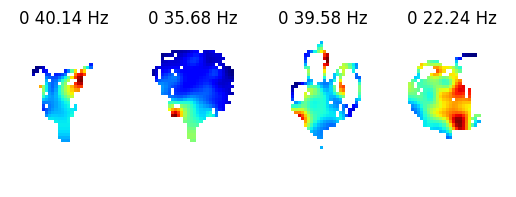

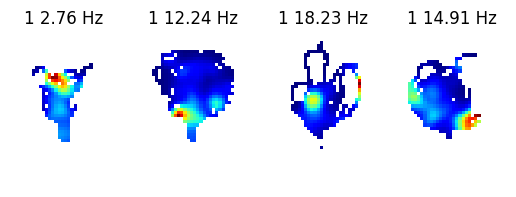

(438, 34, 50)

In [134]:
for i in range(0,2):
    fig, axes = plt.subplots(1,4)
    for j,cond in enumerate(conditions):
        m = SHmyMaps[cond][i]
        plotMap(axes[j],m,title="{:.0f} {:.2f} Hz".format(i,np.nanmax(m)),titleY=0.98)

    plt.show()
SHmyMaps[conditions[0]].shape
# 27,61,137,172,173,190

## Put together the within-task remapping

# Statistics on the remapping data 

We need to compare r values statistically to say that r1 is different from r2.

We can transform the r values to z values using the Fisher Z-transformation. https://en.wikipedia.org/wiki/Fisher_transformation
The transformation can be done with np.arctanh and the inverse is np.tanh

The standard deviation of the z distribution is $\sqrt{\frac{1}{N-3}}$



The difference of z is 

$z = \frac{(Z1 - Z2)}{\sqrt{(1/(N1-3) + 1/(N2-3) )}}$

is approximately Standard Normal distributed.

/tmp/ipykernel_1235565/2857998922.py:2: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(r)


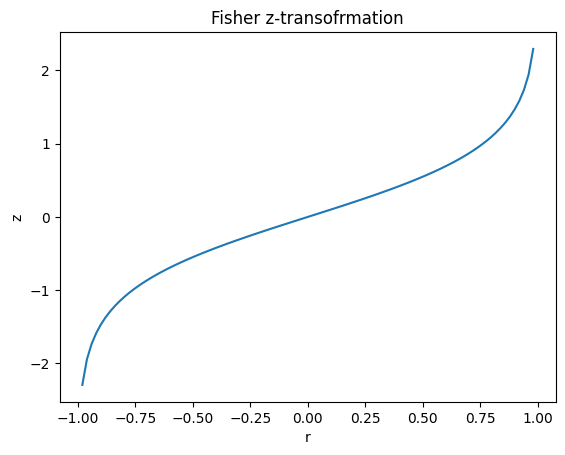

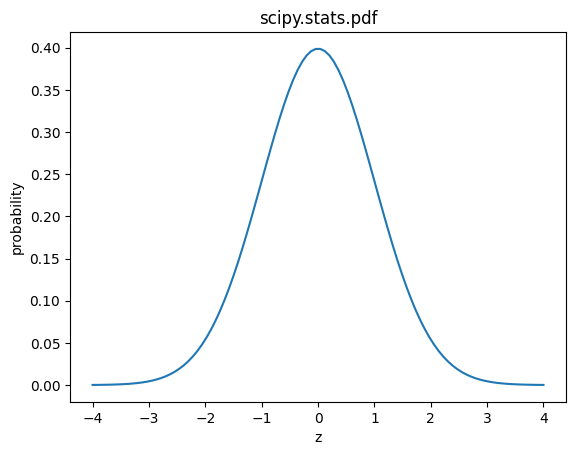

In [135]:
r = np.linspace(-1,1,100)
z = np.arctanh(r)
plt.plot(r,z)
plt.xlabel("r")
plt.ylabel("z")
plt.title("Fisher z-transofrmation")
plt.show()

z = np.linspace(-4,4,100)


plt.plot(z,stats.norm.pdf(z))
plt.xlabel("z")
plt.ylabel("probability")
plt.title("scipy.stats.pdf")
plt.show()



In [136]:
import scipy.stats as stats
def correlationCoefficientDifferent(r1,n1,r2,n2):
    """
    Test the null hypothesis that two correlation coefficients are taken from the same population
    """
   
    z1 = np.arctanh(r1)
    z2 = np.arctanh(r2)
    z = (z1-z2)/np.sqrt((1/(n1-3)) + (1/(n2-3)))
       
    p = stats.norm.pdf(z) # probability of a z score
    return z1,z2,z,p

In [137]:
correlationCoefficientDifferent(r1=0.7,n1=300,r2=0.3,n2=300)

(0.8673005276940531,
 0.30951960420311175,
 6.797150465720579,
 3.70198907451003e-11)

In [138]:
pairDf.columns
pairDf

,ifrAsso_circ80,ifrAsso_circ80_1,ifrAsso_circ80_2,ifrAsso_all_task,ifrAsso_all_task_1,ifrAsso_all_task_2,ifrAsso_light,ifrAsso_dark,ifrAsso_light_1,ifrAsso_light_2,...,mapSim_all_light,mapSim_all_dark,mapSim_all_light_1,mapSim_all_light_2,mapSim_all_dark_1,mapSim_all_dark_2,id1.1,id2.1,session.1,mouse
21,-0.091828,-0.063065,-0.121687,-0.023921,-0.036597,-0.015462,0.015037,0.044518,0.029946,0.001785,...,0.282578,0.457383,0.068816,0.175512,0.313259,0.296184,mn5824-20112020-0107_92,mn5824-20112020-0107_100,mn5824-20112020-0107,mn5824
22,0.052365,0.073910,0.037768,-0.061093,-0.068342,-0.064014,-0.016365,-0.029233,-0.018834,-0.013267,...,-0.253845,-0.030114,-0.232756,-0.295880,-0.280077,0.150678,mn5824-20112020-0107_92,mn5824-20112020-0107_114,mn5824-20112020-0107,mn5824
23,0.090657,0.062220,0.116023,-0.049118,-0.089225,-0.011511,-0.011697,-0.027349,-0.022692,-0.001309,...,0.096521,0.344591,0.081249,0.094420,0.267376,0.382642,mn5824-20112020-0107_92,mn5824-20112020-0107_116,mn5824-20112020-0107,mn5824
24,0.005278,-0.075218,0.081084,-0.033683,-0.068591,0.015078,-0.013363,-0.022799,0.005896,-0.022358,...,0.238551,0.173964,0.337858,0.120725,0.289100,-0.055252,mn5824-20112020-0107_92,mn5824-20112020-0107_118,mn5824-20112020-0107,mn5824
25,-0.110992,-0.107382,-0.115123,0.063167,0.076364,0.052486,0.032997,0.124966,0.025868,0.041368,...,-0.442106,0.329155,-0.525344,-0.264357,0.291587,0.306029,mn5824-20112020-0107_92,mn5824-20112020-0107_122,mn5824-20112020-0107,mn5824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22632,-0.050186,-0.067404,-0.041245,0.013902,0.019317,0.005991,-0.030094,-0.044682,-0.043367,-0.019695,...,-0.079162,0.114080,-0.004653,-0.083732,0.206915,0.018243,mn9686-01112021-0106_81,mn9686-01112021-0106_242,mn9686-01112021-0106,mn9686
22633,0.081321,0.038737,0.122926,-0.007135,-0.033110,0.004270,-0.014177,-0.028109,0.007363,-0.035474,...,-0.022642,-0.381835,-0.009791,-0.152548,-0.177406,-0.401231,mn9686-01112021-0106_81,mn9686-01112021-0106_246,mn9686-01112021-0106,mn9686
22808,-0.008966,-0.004956,-0.023751,0.100510,0.089705,0.116335,0.016134,0.071920,0.007532,0.028246,...,0.205366,0.223402,0.113807,0.273568,0.372079,-0.041410,mn9686-01112021-0106_197,mn9686-01112021-0106_242,mn9686-01112021-0106,mn9686
22809,-0.055126,-0.023738,-0.078989,0.011989,0.051113,-0.017645,-0.026991,0.008282,-0.025337,-0.029993,...,-0.035209,-0.341916,-0.050574,-0.074411,-0.211873,-0.288988,mn9686-01112021-0106_197,mn9686-01112021-0106_246,mn9686-01112021-0106,mn9686


In [139]:
prefixes = ["ifrAsso","mapSim"]
conditions = [("circ80_1","circ80_2","circ80_1", "all_task_1"),
              ("all_task_1","all_task_2","circ80_1","all_task_1")]
for pre in prefixes:
    for c1a,c1b,c2a,c2b in conditions:
        a = pairDf[pre+"_"+c1a]
        b = pairDf[pre+"_"+c1b]
        indices = np.logical_and(~np.isnan(a), ~np.isnan(b))
        n1 = np.sum(indices)
        r1,pv1 =pearsonr(a[indices],b[indices])
        a = pairDf[pre+"_"+c2a]
        b = pairDf[pre+"_"+c2b]
        indices = np.logical_and(~np.isnan(a), ~np.isnan(b))
        n2 = np.sum(indices)
        r2,pv2 =pearsonr(a[indices],b[indices])
        z1,z2,z,p = correlationCoefficientDifferent(r1=r1,n1=n1,r2=r2,n2=n2)
        print("{}   {}-{} vs {}-{}, r1:{:.3f}, pv1:{:e}, r2:{:.3f}, pv2:{:e}, z:{:.3f}, p:{:e},".format(pre,c1a,c1b,c2a,c2b,r1,pv1,r2,pv2,z,p))

ifrAsso   circ80_1-circ80_2 vs circ80_1-all_task_1, r1:0.738, pv1:0.000000e+00, r2:0.092, pv2:6.672928e-11, z:43.000, p:0.000000e+00,
ifrAsso   all_task_1-all_task_2 vs circ80_1-all_task_1, r1:0.823, pv1:0.000000e+00, r2:0.092, pv2:6.672928e-11, z:54.193, p:0.000000e+00,
mapSim   circ80_1-circ80_2 vs circ80_1-all_task_1, r1:0.659, pv1:0.000000e+00, r2:0.022, pv2:1.131031e-01, z:38.625, p:0.000000e+00,
mapSim   all_task_1-all_task_2 vs circ80_1-all_task_1, r1:0.546, pv1:0.000000e+00, r2:0.022, pv2:1.131031e-01, z:29.777, p:1.151749e-193,


In [140]:
SHpairDf.columns

Index(['ifrAsso_searchToLeverPath_light',
       'ifrAsso_homingFromLeavingLever_light',
       'ifrAsso_searchToLeverPath_dark', 'ifrAsso_homingFromLeavingLever_dark',
       'ifrAsso_searchToLeverPath_light_1',
       'ifrAsso_searchToLeverPath_light_2', 'ifrAsso_searchToLeverPath_dark_1',
       'ifrAsso_searchToLeverPath_dark_2',
       'ifrAsso_homingFromLeavingLever_light_1',
       'ifrAsso_homingFromLeavingLever_light_2',
       'ifrAsso_homingFromLeavingLever_dark_1',
       'ifrAsso_homingFromLeavingLever_dark_2', 'id1', 'id2', 'session',
       'mapSim_searchToLeverPath_light', 'mapSim_homingFromLeavingLever_light',
       'mapSim_searchToLeverPath_dark', 'mapSim_homingFromLeavingLever_dark',
       'mapSim_searchToLeverPath_light_1', 'mapSim_searchToLeverPath_light_2',
       'mapSim_searchToLeverPath_dark_1', 'mapSim_searchToLeverPath_dark_2',
       'mapSim_homingFromLeavingLever_light_1',
       'mapSim_homingFromLeavingLever_light_2',
       'mapSim_homingFromLeavingLev

In [141]:
prefixes = ["ifrAsso","mapSim"]
conditions = [("searchToLeverPath_light_1","searchToLeverPath_light_2","searchToLeverPath_light_1", "homingFromLeavingLever_light_1"),
              ("searchToLeverPath_dark_1","searchToLeverPath_dark_2","searchToLeverPath_dark_1", "homingFromLeavingLever_dark_1")]

for pre in prefixes:
    for c1a,c1b,c2a,c2b in conditions:
        a = SHpairDf[pre+"_"+c1a]
        b = SHpairDf[pre+"_"+c1b]
        indices = np.logical_and(~np.isnan(a), ~np.isnan(b))
        n1 = np.sum(indices)
        r1,pv =pearsonr(a[indices],b[indices])
        a = SHpairDf[pre+"_"+c2a]
        b = SHpairDf[pre+"_"+c2b]
        indices = np.logical_and(~np.isnan(a), ~np.isnan(b))
        n2 = np.sum(indices)
        r2,pv =pearsonr(a[indices],b[indices])
        z1,z2,z,p = correlationCoefficientDifferent(r1=r1,n1=n1,r2=r2,n2=n2)
        print("{}    {}-{} vs {}-{}, r1:{:.3f}, r2:{:.3f}, z:{:.3f}, p:{},".format(pre,c1a,c1b,c2a,c2b,r1,r2,z,p))

ifrAsso    searchToLeverPath_light_1-searchToLeverPath_light_2 vs searchToLeverPath_light_1-homingFromLeavingLever_light_1, r1:0.498, r2:0.171, z:17.909, p:8.94086485060554e-71,
ifrAsso    searchToLeverPath_dark_1-searchToLeverPath_dark_2 vs searchToLeverPath_dark_1-homingFromLeavingLever_dark_1, r1:0.659, r2:0.177, z:29.759, p:1.9984664619768955e-193,
mapSim    searchToLeverPath_light_1-searchToLeverPath_light_2 vs searchToLeverPath_light_1-homingFromLeavingLever_light_1, r1:0.315, r2:0.082, z:11.440, p:1.527693629742144e-29,
mapSim    searchToLeverPath_dark_1-searchToLeverPath_dark_2 vs searchToLeverPath_dark_1-homingFromLeavingLever_dark_1, r1:0.457, r2:0.108, z:18.725, p:2.915312030031291e-77,
